In [1]:
!git clone https://github.com/AshishJangra27/Face-Generator-with-GAN

import os
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

import imageio
from tqdm import tqdm


os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

generator = tf.keras.models.load_model('/content/Face-Generator-with-GAN/generator_700.h5', compile=False)

Cloning into 'Face-Generator-with-GAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 160.27 MiB | 17.17 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
noise = tf.random.normal([1, 100])

with tf.device('/CPU:0'):
    generated_images = generator(noise, training=False)

generated_images = (generated_images + 1) / 2.0

plt.imshow(generated_images[0])
plt.axis('off')

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

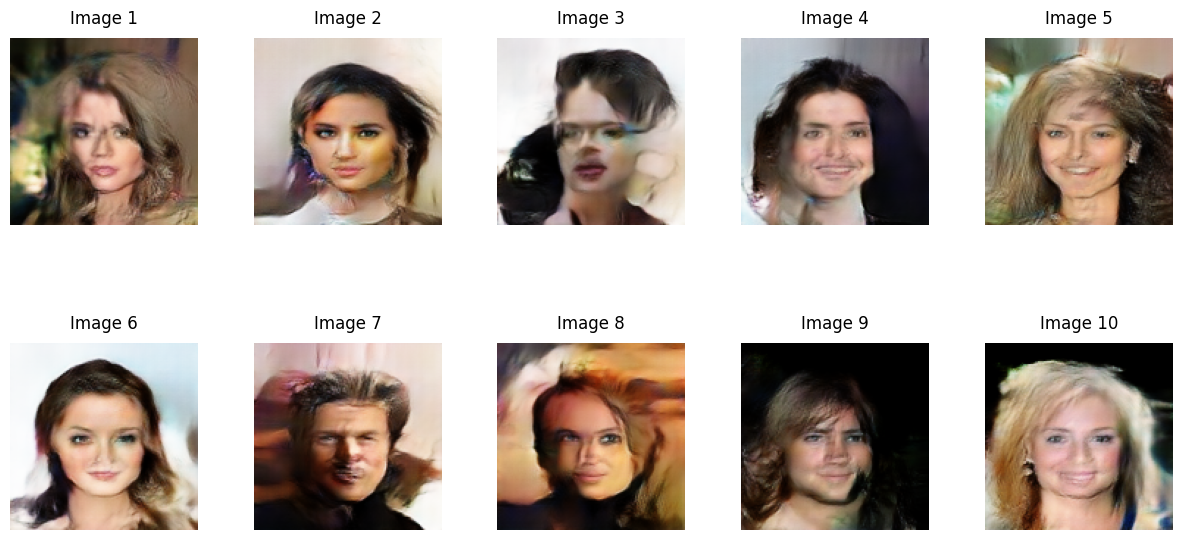

In [3]:
def generate_multiple_images(model, noise_dim=100, num_images=10):
    fig, axes = plt.subplots(2, 5, figsize=(15, 7))  # 10 rows, 5 columns

    for i in range(num_images):
        noise = tf.random.normal([1, noise_dim])  # Generate random noise

        with tf.device('/CPU:0'):
            generated_image = model(noise, training=False)

        generated_image = (generated_image + 1) / 2.0  # Rescale for visualization

        # Plot the generated image
        ax = axes[i // 5, i % 5]  # Row-wise placement
        ax.imshow(generated_image[0])
        ax.axis('off')
        ax.set_title(f"Image {i+1}", fontsize=12, pad=10)

    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between images
    plt.show()

generate_multiple_images(generator)

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  ##upload the female and male files here from system

Saving female_images_data.csv to female_images_data.csv
Saving male_images_data.csv to male_images_data.csv
User uploaded file "female_images_data.csv" with length 2101762 bytes
User uploaded file "male_images_data.csv" with length 2098169 bytes


In [5]:
import ast
import pandas as pd

male_vec   = pd.read_csv('/content/male_images_data.csv')['noise_vector']
female_vec = pd.read_csv('/content/female_images_data.csv')['noise_vector']

male_vec = np.array([np.array(ast.literal_eval(vec)) for vec in male_vec])
female_vec = np.array([np.array(ast.literal_eval(vec)) for vec in female_vec])

avg_male_vec = np.mean(male_vec, axis=0)
avg_female_vec = np.mean(female_vec, axis=0)

print("Average Noise Vector (Male):", avg_male_vec)
print("Average Noise Vector (Female):", avg_female_vec)

Average Noise Vector (Male): [[-0.03971258 -0.06965943  0.00356897  0.00640304 -0.21249051 -0.09229452
  -0.04259478  0.07553213  0.22617031 -0.17790783  0.28319609  0.10857499
  -0.03823045 -0.31559354 -0.24628071  0.03348317 -0.22993282  0.04861173
  -0.00585154 -0.08720009 -0.08516999 -0.18133756  0.11148302  0.08788833
   0.15843068  0.04221111 -0.05985005  0.17341407  0.16704901 -0.0814995
   0.01657156  0.12935034 -0.11328441 -0.25267418  0.13558398 -0.28655694
   0.33639507  0.01914521  0.17857791  0.19870061 -0.05791203 -0.10840931
  -0.18405729 -0.01757116 -0.16858907  0.15148676  0.00552569  0.06799198
  -0.05409135  0.03634662 -0.11298827  0.19775391  0.03667391  0.12799914
  -0.12258946  0.03495421 -0.03805487  0.1108679  -0.20347688 -0.0874216
  -0.00659081 -0.14985104  0.12018388 -0.08695146  0.10339797  0.33737177
  -0.07528706 -0.04015739  0.11054354  0.0293739  -0.09600242  0.19884786
   0.14673617 -0.00366311 -0.1227755  -0.04305195 -0.14596911 -0.08136474
  -0.010025

In [6]:
gender_vec = avg_female_vec - avg_male_vec

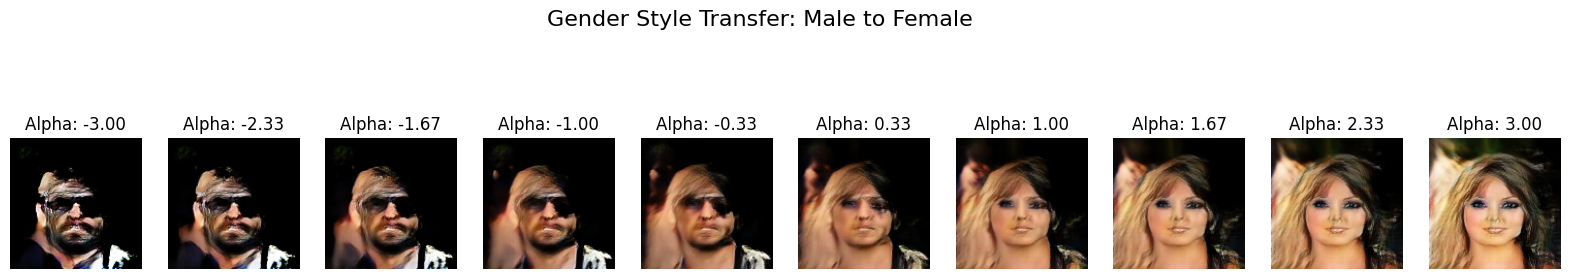

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assume 'generator' and 'gender_vec' are already loaded from the previous steps
# generator = tf.keras.models.load_model(...)
# gender_vec = np.load(...)

def generate(noise):
    """Generates and normalizes an image from a noise vector."""
    # The model output is in the range [-1, 1]. We scale it to [0, 1] for display.
    return (generator(noise, training=False) + 1) / 2.0

# --- Start of new/modified code ---

# 1. Define the number of variations required
n_variations = 10

# 2. Create a base latent vector (noise)
tf.random.set_seed(42) # Use a seed for reproducibility
noise = tf.random.normal([1, 100])

# 3. Generate a range of modifiers from negative (male) to positive (female)
# We use np.linspace to get exactly 10 evenly spaced values.
# A range like -3 to 3 often gives a good, distinct transition.
modifications = np.linspace(-3, 3, n_variations)

# 4. Set up the plot with the correct number of subplots
fig, axes = plt.subplots(1, n_variations, figsize=(20, 4))

# 5. Loop through the modifiers and generate images
for i, mod in enumerate(modifications):
    # Create the new latent vector by applying the gender vector modification
    modified_noise = noise + mod * gender_vec

    # Generate and display the image
    axes[i].imshow(generate(modified_noise)[0])
    axes[i].set_title(f'Alpha: {mod:.2f}') # Add alpha value as title
    axes[i].axis("off")

# Add a main title and display the plot
plt.suptitle("Gender Style Transfer: Male to Female", fontsize=16)
plt.show()

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assume 'generator' and 'gender_vec' are already loaded
# generator = tf.keras.models.load_model(...)
# gender_vec = np.load(...)

def generate(noise):
    """Generates and normalizes an image from a noise vector."""
    return (generator(noise, training=False) + 1) / 2.0

# --- Start of new/modified code ---

# 1. Define the grid dimensions
n_rows = 10  # How many different base faces to generate
n_cols = 11  # How many gender variations for each face

# 2. Generate a batch of different base noise vectors (one for each row)
tf.random.set_seed(42) # Use a seed for reproducibility
noises = tf.random.normal([n_rows, 100])

# 3. Create the modification range from negative (male) to positive (female)
# This creates 11 evenly spaced values from -2.5 to 2.5
modifications = np.linspace(-2.5, 2.5, n_cols)

# 4. Set up the plot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# 5. Loop through each base noise (row) and each modification (column)
print("--> Generating image grid...")
for row in range(n_rows):
    for col in range(n_cols):
        # Get the specific noise and modification for this cell
        noise = noises[row:row+1, :] # Keep dimensions as (1, 100)
        mod = modifications[col]

        # Apply the modification and generate the image
        modified_noise = noise + mod * gender_vec
        image = generate(modified_noise)

        # Display the image in the correct cell
        axes[row, col].imshow(image[0])
        axes[row, col].axis("off")

# Add titles and clean up the layout
fig.suptitle("Gender Style Transfer Grid (Male to Female)", fontsize=20, y=0.93)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
print("--> Done.")

--> Generating image grid...


--> Done.


--> Generating 120 frames for the GIF...
--> Saving GIF to face_transformation.gif...
--> Done. ✅


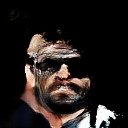

In [9]:
import tensorflow as tf
import numpy as np
import imageio  # You may need to install this library
from IPython.display import display, Image

# If you don't have imageio installed, uncomment and run the following line:
# !pip install imageio imageio-ffmpeg

# Assume 'generator' and 'gender_vec' are already loaded from previous steps
# generator = tf.keras.models.load_model(...)
# gender_vec = np.load(...)

def generate(noise):
    """Generates and normalizes an image from a noise vector."""
    # The model output is in the range [-1, 1]. We scale it to [0, 1] for display.
    return (generator(noise, training=False) + 1) / 2.0

# --- GIF Generation Logic ---

# 1. Define animation parameters
n_frames = 120  # Total number of frames for a smooth animation
gif_filename = "face_transformation.gif"
fps = 30  # Frames per second for the GIF

# 2. Create a single base latent vector (the starting face)
tf.random.set_seed(42)  # Use a seed for a consistent result
noise = tf.random.normal([1, 100])

# 3. Generate a smooth range of modifications from male (-3) to female (3)
modifications = np.linspace(-3, 3, n_frames)

# 4. Generate each frame for the GIF
print(f"--> Generating {n_frames} frames for the GIF...")
frames = []
for mod in modifications:
    # Apply the modification to the base noise
    modified_noise = noise + mod * gender_vec

    # Generate the image and convert from a Tensor to a NumPy array
    img_tensor = generate(modified_noise)
    img_numpy = img_tensor[0].numpy()

    # Convert pixel values from [0, 1] float to [0, 255] uint8 for image saving
    img_formatted = (img_numpy * 255).astype(np.uint8)
    frames.append(img_formatted)

# 5. Save the frames as a GIF
print(f"--> Saving GIF to {gif_filename}...")
imageio.mimsave(gif_filename, frames, fps=fps)
print("--> Done. ✅")

# 6. Display the generated GIF in the notebook
display(Image(filename=gif_filename))

In [10]:
import os
import shutil
import numpy as np
from PIL import Image
from google.colab import files # Colab's library for file handling

# --- 1. Setup: Define paths and create folders ---
# In Colab, your working directory is /content/
male_folder = "/content/generated_males"
female_folder = "/content/generated_females"

# Create the folders if they don't already exist
os.makedirs(male_folder, exist_ok=True)
os.makedirs(female_folder, exist_ok=True)

print(f"Created directories: {male_folder} and {female_folder}")

# --- 2. (Optional) Create some dummy images for demonstration ---
# In your actual code, this is where you would save your generated faces.
print("Generating and saving placeholder images...")
for i in range(5):
    # Create a random noise image
    male_img_data = np.random.randint(0, 255, size=(64, 64, 3), dtype=np.uint8)
    female_img_data = np.random.randint(0, 255, size=(64, 64, 3), dtype=np.uint8)

    # Convert to an image and save
    Image.fromarray(male_img_data).save(os.path.join(male_folder, f"male_{i}.png"))
    Image.fromarray(female_img_data).save(os.path.join(female_folder, f"female_{i}.png"))

print("Placeholder images saved. ✅")

# --- 3. Zip the folders using shutil ---
# Define the names for the output zip files (without the .zip extension)
male_zip_path = "/content/male_images"
female_zip_path = "/content/female_images"

print("\nZipping folders...")
shutil.make_archive(male_zip_path, 'zip', male_folder)
shutil.make_archive(female_zip_path, 'zip', female_folder)

print("Zipping complete! Files are male_images.zip and female_images.zip")

# --- 4. Trigger download for the created zip files ---
print("\nPreparing files for download...")
files.download(f"{male_zip_path}.zip")
files.download(f"{female_zip_path}.zip")

Created directories: /content/generated_males and /content/generated_females
Generating and saving placeholder images...
Placeholder images saved. ✅

Zipping folders...
Zipping complete! Files are male_images.zip and female_images.zip

Preparing files for download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>